In [1]:
#NEERAJ PATIL
#Topic:
#Predicting Placement in Campus Recruitment.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Datasets_Placement_Data.csv')
data.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.shape

(215, 15)

In [4]:
#describe is used only for continuous variable
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [6]:
#check for missing values
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
#Fill the null values using median or mode.
#use median since salary is continuous variable
data['salary'].fillna(value = (data['salary'].median()), inplace=True)
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


0    M
dtype: object
M    0.646512
F    0.353488
Name: gender, dtype: float64


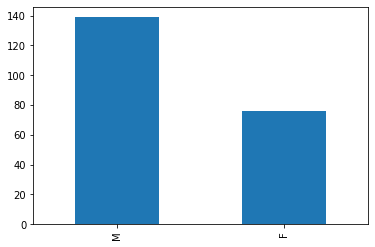

In [8]:
print(data['gender'].mode())
print(data['gender'].value_counts()/len(data))
data['gender'].value_counts().plot(kind='bar') 
#cleary we can see male are approx 65% and female are approx 34%

Commerce    0.525581
Science     0.423256
Arts        0.051163
Name: hsc_s, dtype: float64


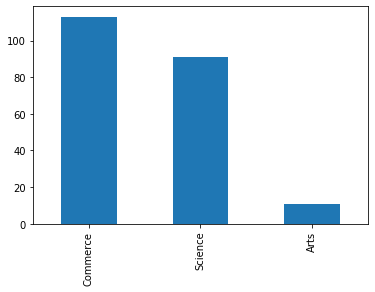

In [9]:
print(data['hsc_s'].value_counts()/len(data))
data['hsc_s'].value_counts().plot(kind='bar')
#commerce 52% science 42% arts 5% 

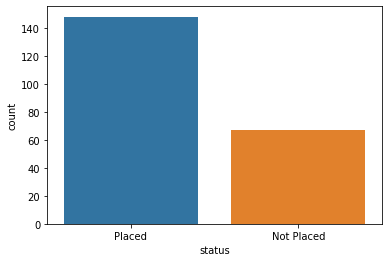

In [10]:
sns.countplot(x='status', data =data)

In [11]:
df=data

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Convert the categorical columns to numerical columns using label encoder
label=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
le=LabelEncoder()
for i in label:
    df[i]=le.fit_transform(df[i])

In [14]:
df.shape

(215, 15)

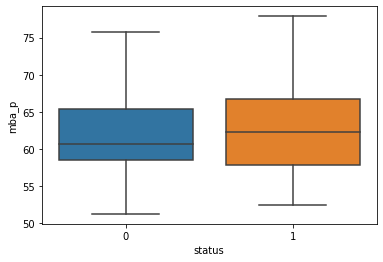

In [15]:
sns.boxplot(x='status',y='mba_p',data=data)
# from the boxplot we can analyse that 
#mba marks who are placed can be of range 53 to 85
#mba marks who aren't placed can be of range 51 to 75

In [16]:
#Splitting dataset 
x = df.drop(['status'], axis=1)
y = df['status']

In [55]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(x,y, test_size=0.2,random_state = 0)

"""
In this context, stratification means that the train_test_split method returns training and test subsets that
have the same proportions of class labels as the input dataset.
"""

'\nIn this context, stratification means that the train_test_split method returns training and test subsets that\nhave the same proportions of class labels as the input dataset.\n'

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
model1 = LogisticRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(valid_x)
pred1[:]

C:\Users\NEEERAJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [58]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
confusion_mat=confusion_matrix(valid_y, pred1)

In [60]:
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predict neg","predict pos"])

In [61]:
confusion_df

,predict neg,predict pos
actual neg,9,7
actual pos,2,25


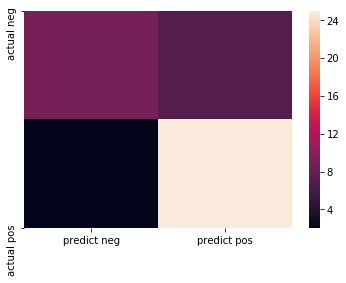

In [62]:
color_mat=sns.heatmap(confusion_df)

In [63]:
model1.score(valid_x,valid_y)

0.7906976744186046

In [64]:
from sklearn import metrics

In [65]:
print(metrics.classification_report(valid_y, pred1))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.78      0.93      0.85        27

    accuracy                           0.79        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.79      0.79      0.78        43



In [66]:
pred_new=model1.predict([[1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,300000]])
pred_new

array([1])

In [93]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
pred2[:]

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [94]:
confusion_mat=confusion_matrix(valid_y, pred2)

In [95]:
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predict neg","predict pos"])

In [96]:
confusion_df

,predict neg,predict pos
actual neg,16,0
actual pos,0,27


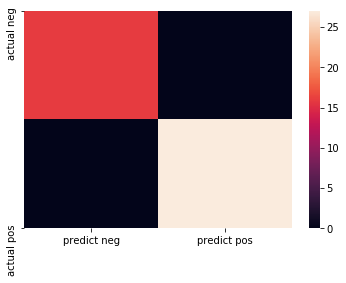

In [97]:
color_mat=sns.heatmap(confusion_df)

In [98]:
print(metrics.classification_report(valid_y, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        27

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [99]:
model2.score(valid_x,valid_y)

1.0

In [100]:
pred_new=model1.predict([[1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,300000]])
pred_new

array([1])

In [75]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
pred3[:]

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [76]:
confusion_mat=confusion_matrix(valid_y, pred3)

In [77]:
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predict neg","predict pos"])

In [78]:
confusion_df

,predict neg,predict pos
actual neg,15,1
actual pos,2,25


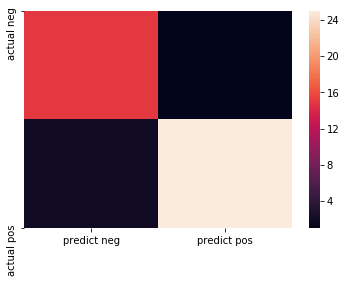

In [79]:
color_mat=sns.heatmap(confusion_df)

In [80]:
print(metrics.classification_report(valid_y, pred3))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.93      0.94        27

    accuracy                           0.93        43
   macro avg       0.92      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



In [81]:
model3.score(valid_x,valid_y)

0.9302325581395349

In [82]:
pred_new=model3.predict([[1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,250000]])
pred_new

array([1])

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40,criterion='entropy', random_state=42)

In [84]:
model4=rf.fit(train_x, train_y)
pred4=model4.predict(valid_x)

In [85]:
confusion_mat=confusion_matrix(valid_y, pred4)

In [86]:
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predict neg","predict pos"])

In [87]:
confusion_df

,predict neg,predict pos
actual neg,12,4
actual pos,3,24


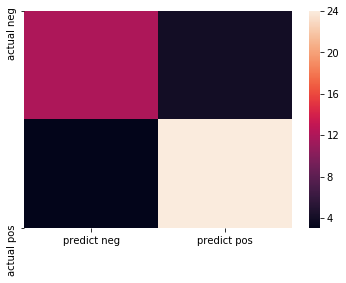

In [88]:
color_mat=sns.heatmap(confusion_df)

In [89]:
print(metrics.classification_report(valid_y, pred4))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.86      0.89      0.87        27

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.84      0.84      0.84        43



In [90]:
model4.score(valid_x,valid_y)

0.8372093023255814

In [91]:
m1_score= model1.score(valid_x, valid_y)
m2_score= model2.score(valid_x, valid_y)
m3_score= model3.score(valid_x, valid_y)
m4_score= model4.score(valid_x, valid_y)
m1_score, m2_score, m3_score, m4_score

(0.7906976744186046, 1.0, 0.9302325581395349, 0.8372093023255814)